In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("zillow_indy_10k_enriched.csv")
df.head()

,zpid,address,sale_price,bedrooms,bathrooms,living_area,year_built,zipcode,lat,lon,lot_area_value,lot_area_unit,lot_area_sqft
0,1077522,"416 S Rural St, Indianapolis, IN 46201",78000.0,2.0,1.0,1816.0,1918.0,46201.0,39.761307,-86.116610,3920.4,sqft,3920.4
1,1085356,"931 Jefferson Ave, Indianapolis, IN 46201",245000.0,2.0,2.0,2206.0,1910.0,46201.0,39.780403,-86.123510,5227.2,sqft,5227.2
2,112855677,"2814 E Michigan St, Indianapolis, IN 46201",600000.0,2.0,2.0,NaN,2025.0,46201.0,39.774734,-86.116066,4791.6,sqft,4791.6
3,450594621,"2810 E Michigan St, Indianapolis, IN 46201",600000.0,2.0,2.0,NaN,2025.0,46201.0,39.774734,-86.116190,4791.6,sqft,4791.6
4,1104044,"813 N Gladstone Ave, Indianapolis, IN 46201",95200.0,3.0,1.0,2066.0,1920.0,46201.0,39.777847,-86.096085,4791.6,sqft,4791.6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17814 entries, 0 to 17813
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zpid            17814 non-null  int64  
 1   address         17814 non-null  object 
 2   sale_price      17420 non-null  float64
 3   bedrooms        16622 non-null  float64
 4   bathrooms       16576 non-null  float64
 5   living_area     16054 non-null  float64
 6   year_built      16688 non-null  float64
 7   zipcode         17812 non-null  float64
 8   lat             17754 non-null  float64
 9   lon             17754 non-null  float64
 10  lot_area_value  15204 non-null  float64
 11  lot_area_unit   15204 non-null  object 
 12  lot_area_sqft   15204 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.8+ MB


In [3]:
df.describe()

,zpid,sale_price,bedrooms,bathrooms,living_area,year_built,zipcode,lat,lon,lot_area_value,lot_area_sqft
count,1.781400e+04,1.742000e+04,16622.000000,16576.000000,16054.000000,16688.000000,17812.000000,17754.000000,17754.000000,15204.000000,1.520400e+04
mean,1.986034e+08,3.512649e+05,3.158886,2.419673,2157.017254,1975.650048,46198.264653,39.809429,-86.149858,3973.801797,2.060131e+04
std,4.411756e+08,3.737235e+05,1.003135,1.053753,1182.374066,38.383636,61.193159,0.098865,0.107373,3367.504198,5.651526e+05
min,1.069411e+06,1.000000e+00,1.000000,1.000000,1.000000,1850.000000,46032.000000,39.547897,-86.454550,0.000000,0.000000e+00
25%,1.178192e+06,1.963750e+05,3.000000,2.000000,1422.750000,1950.000000,46202.000000,39.751183,-86.208930,0.610000,5.227200e+03
50%,1.313810e+06,2.900000e+05,3.000000,2.000000,1903.500000,1981.000000,46219.000000,39.796062,-86.147710,4356.000000,7.405200e+03
75%,1.456320e+08,3.999000e+05,4.000000,3.000000,2568.000000,2006.000000,46227.000000,39.865810,-86.088037,6534.000000,1.263240e+04
max,2.144019e+09,1.195000e+07,11.000000,15.000000,25133.000000,2026.000000,46290.000000,40.122856,-85.760180,10876.932000,6.891192e+07


In [4]:
df.isna().sum()

zpid                 0
address              0
sale_price         394
bedrooms          1192
bathrooms         1238
living_area       1760
year_built        1126
zipcode              2
lat                 60
lon                 60
lot_area_value    2610
lot_area_unit     2610
lot_area_sqft     2610
dtype: int64

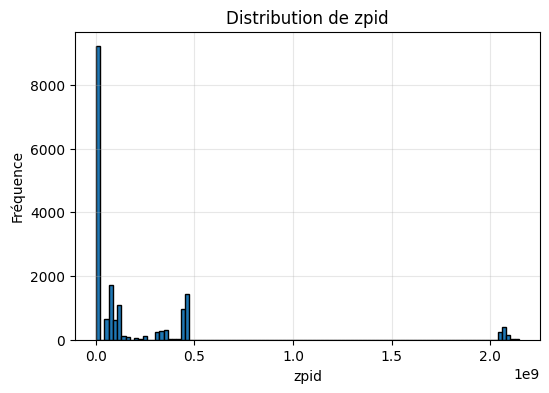

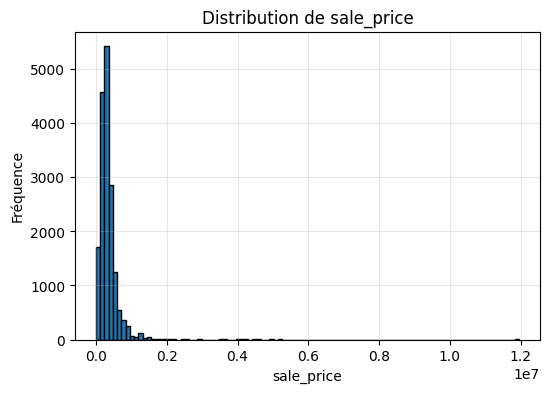

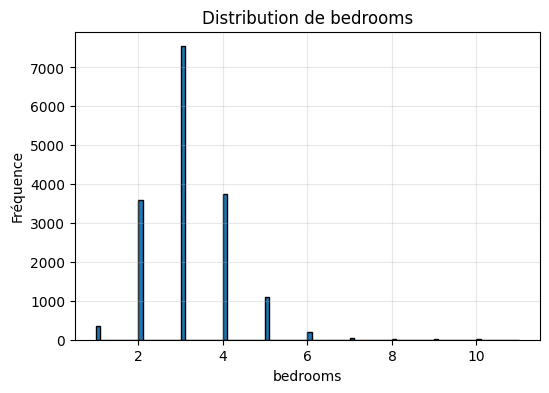

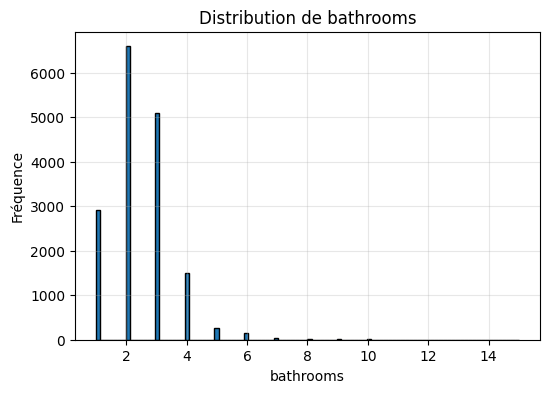

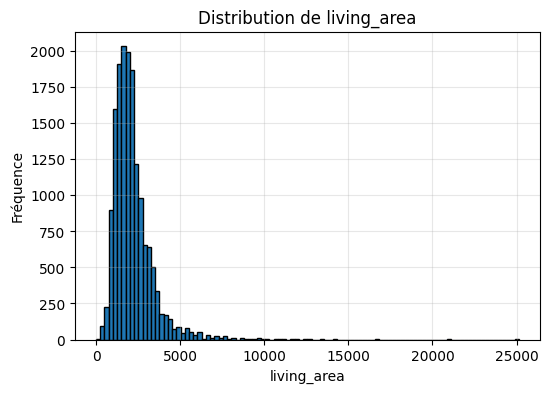

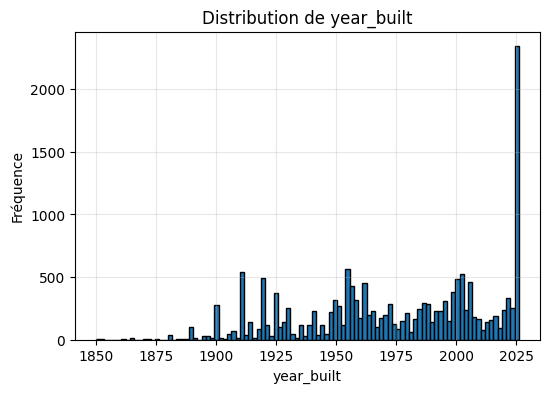

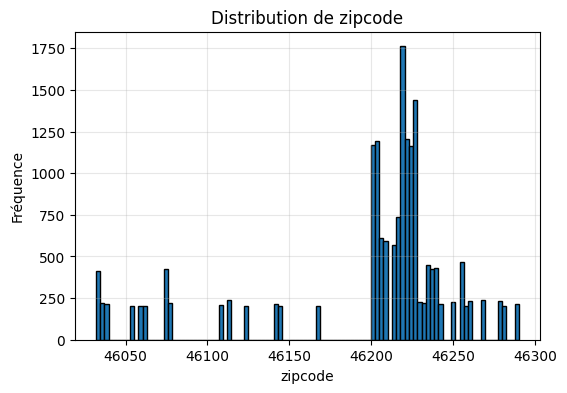

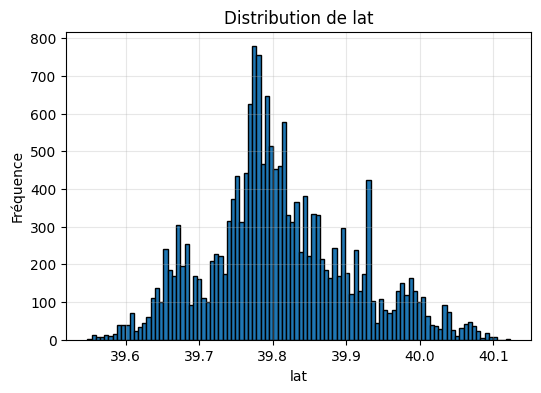

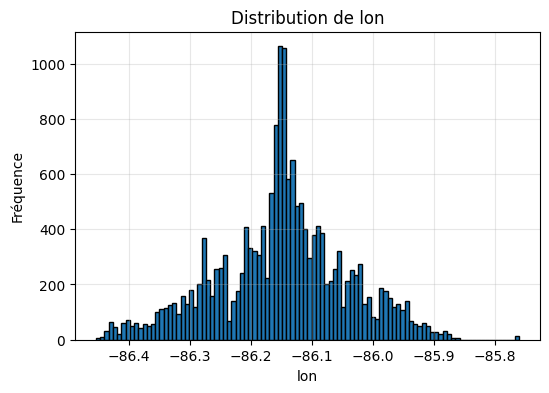

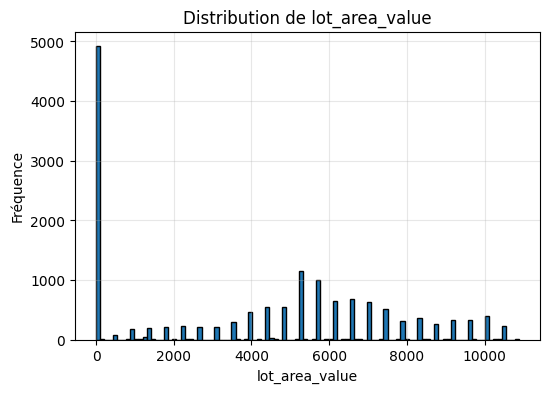

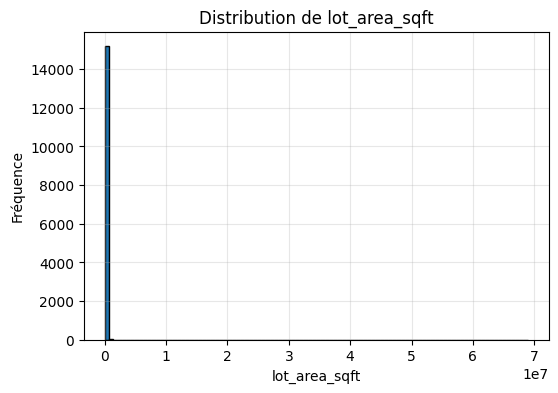

In [5]:
import matplotlib.pyplot as plt

# Sélectionne les colonnes numériques uniquement
numeric_cols = df.select_dtypes(include=["number"]).columns

# Affiche un histogramme par colonne
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=100, edgecolor='black')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(alpha=0.3)
    plt.show()


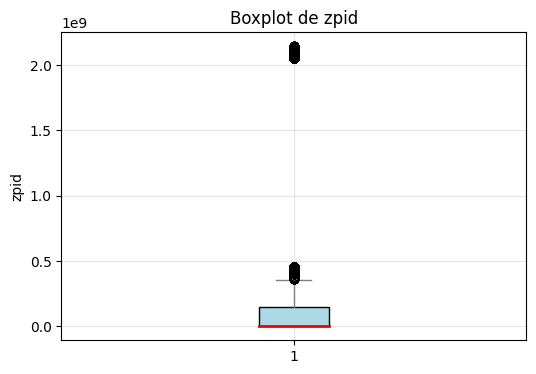

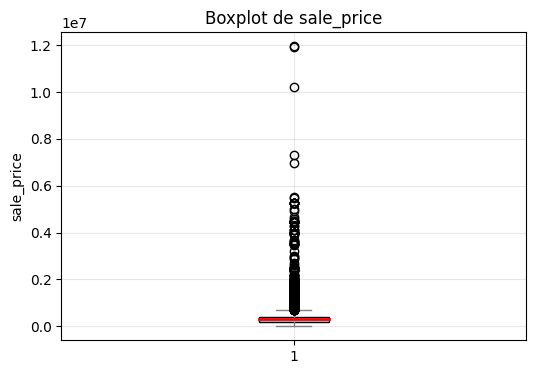

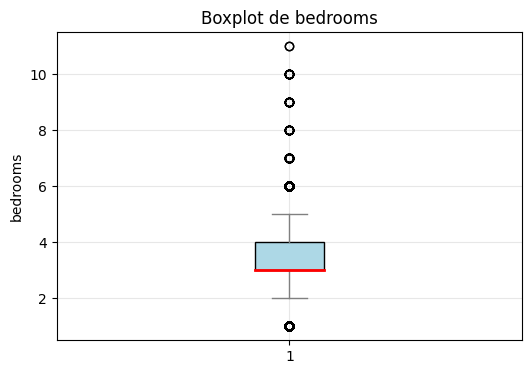

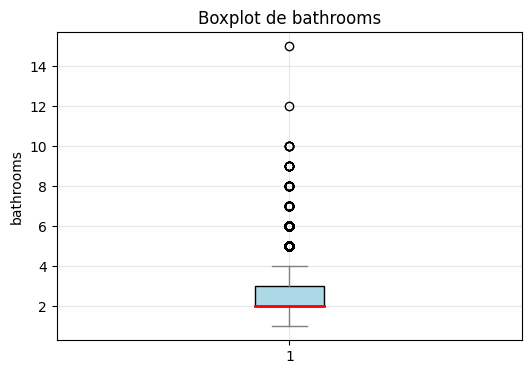

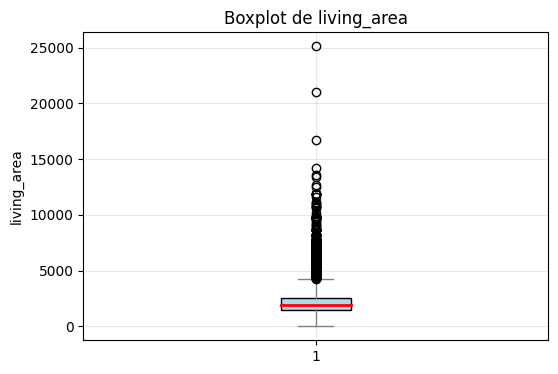

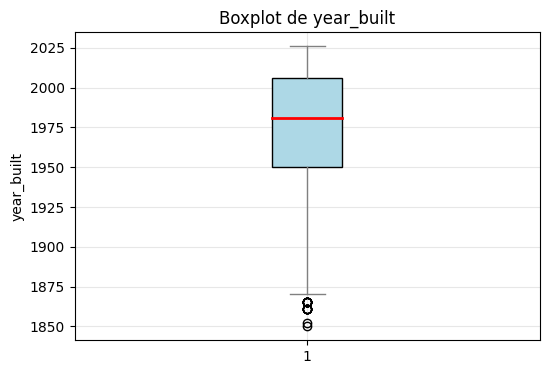

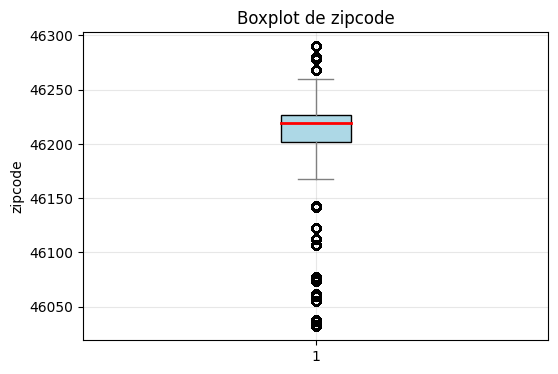

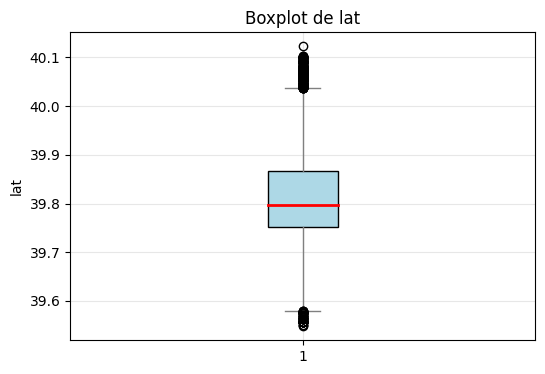

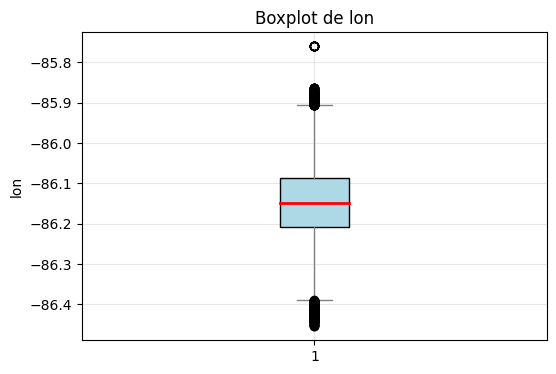

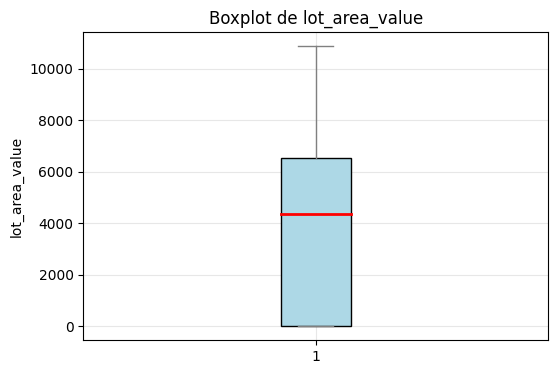

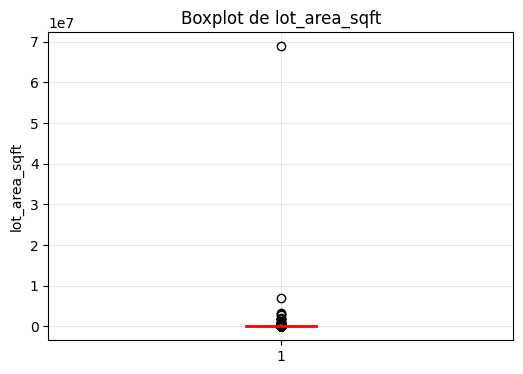

In [6]:

# Trace un boxplot pour chaque variable numérique
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='gray'),
                capprops=dict(color='gray'))
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.grid(alpha=0.3)
    plt.show()


In [7]:
df.duplicated().sum()


11328

In [17]:
# Vérification des doublons dans le DataFrame
col_key = "zpid"  # clé logique des biens immobiliers

# Nombre total de doublons (hors première occurrence)
nb_dups = df.duplicated(subset=[col_key]).sum()
print(f" Nombre de doublons sur '{col_key}' : {nb_dups}")

#  Si des doublons existent, les afficher
if nb_dups > 0:
    print("\nExemples de doublons détectés :")
    display(df[df.duplicated(subset=[col_key], keep=False)].sort_values(by=col_key).head(10))
else:
    print(" Aucun doublon détecté sur la colonne", col_key)


 Nombre de doublons sur 'zpid' : 11332

Exemples de doublons détectés :


,zpid,address,sale_price,bedrooms,bathrooms,living_area,year_built,zipcode,lat,lon,lot_area_value,lot_area_unit,lot_area_sqft
8637,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4
8965,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4
8719,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4
8801,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4
8842,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4
8678,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4
8555,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4
8514,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4
8760,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4
8596,1069559,"331 W Southern Ave, Indianapolis, IN 46225",259900.0,3.0,3.0,2212.0,1952.0,46225.0,39.729374,-86.16468,10454.4,sqft,10454.4


In [19]:
print("Nombre de zpid uniques :", df["zpid"].nunique())
print("Nombre total de lignes :", len(df))


Nombre de zpid uniques : 6482
Nombre total de lignes : 17814


In [21]:
col_key = "zpid"

# Supprimer les doublons sur la colonne 'zpid' (en gardant la première occurrence)
df_unique = df.drop_duplicates(subset=[col_key], keep="first").reset_index(drop=True)

print(f" Lignes initiales : {len(df)}")
print(f" Lignes après suppression des doublons : {len(df_unique)}")
print(f" Différence (doublons supprimés) : {len(df) - len(df_unique)}")


 Lignes initiales : 17814
 Lignes après suppression des doublons : 6482
 Différence (doublons supprimés) : 11332


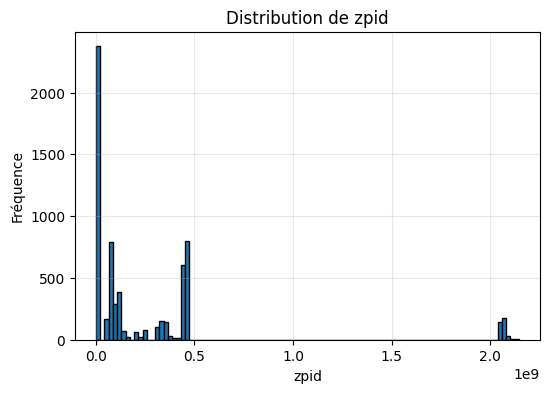

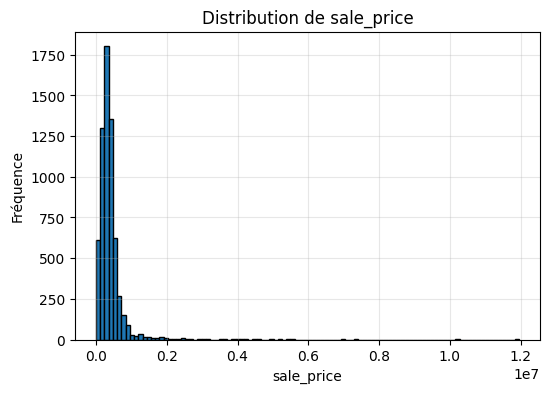

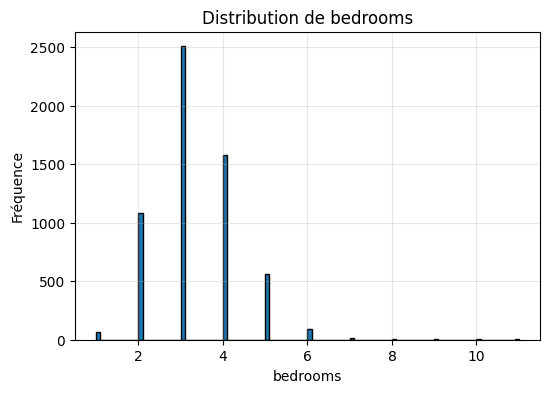

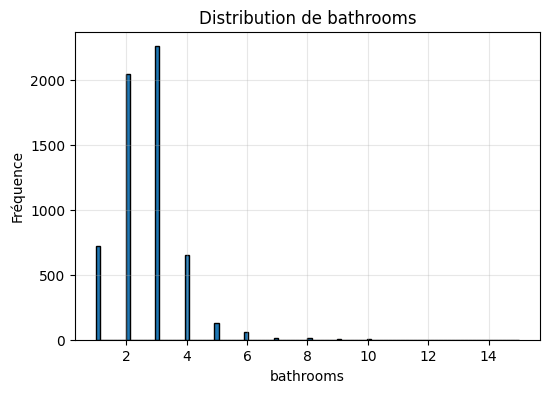

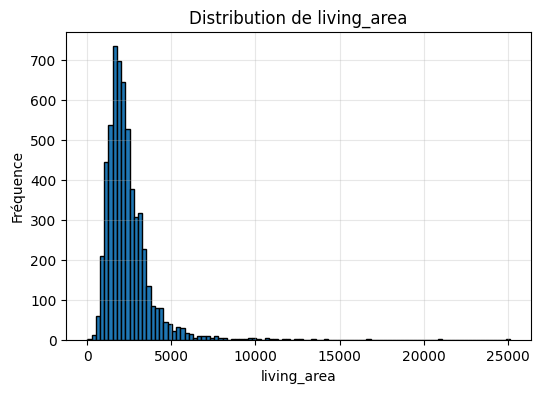

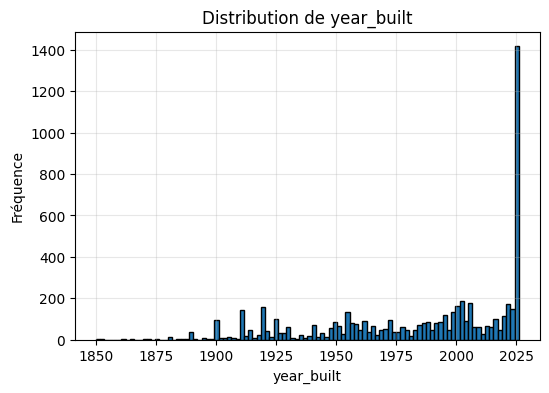

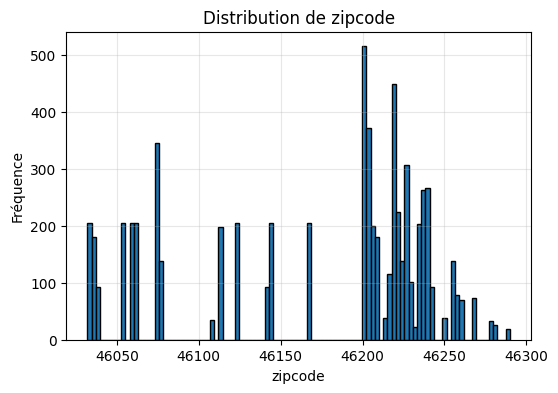

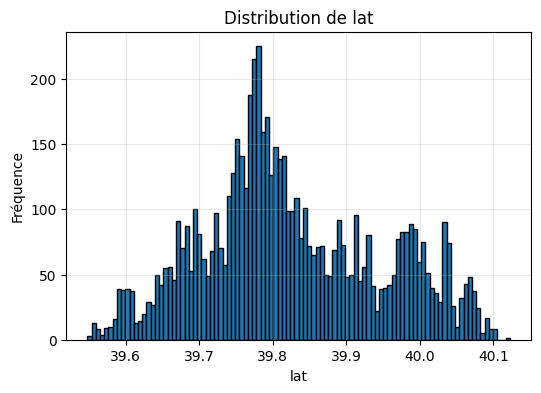

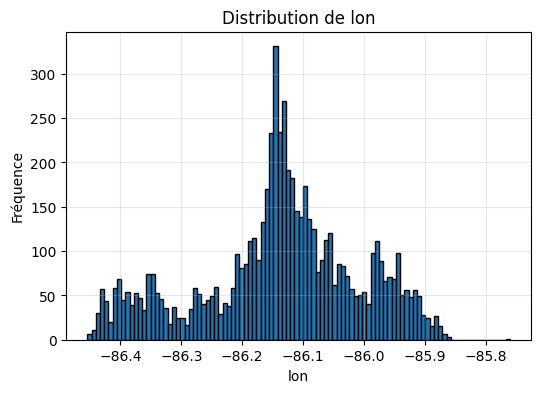

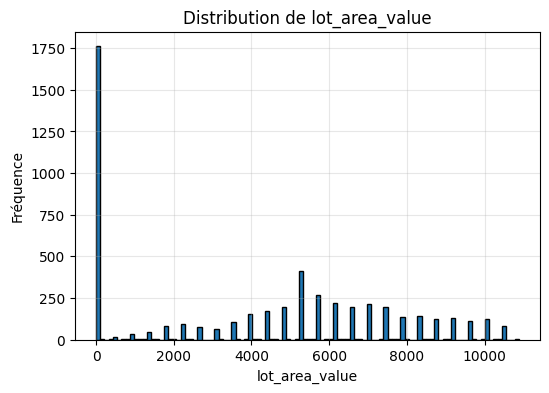

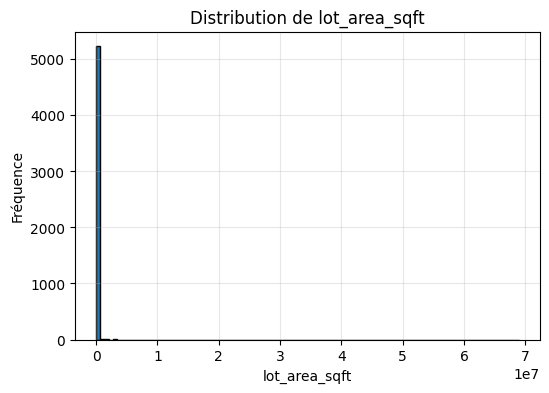

In [23]:
# Affiche un histogramme par colonne
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df_unique[col].dropna(), bins=100, edgecolor='black')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(alpha=0.3)
    plt.show()


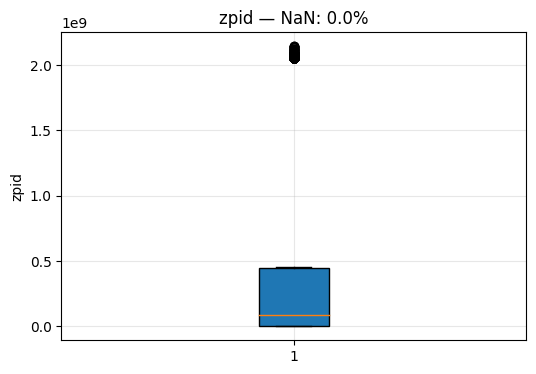

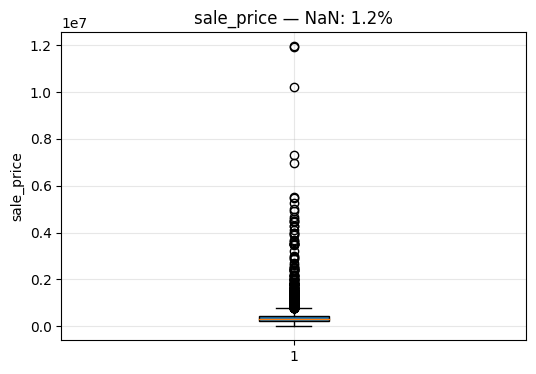

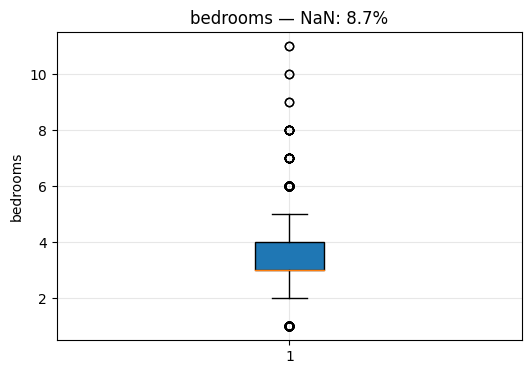

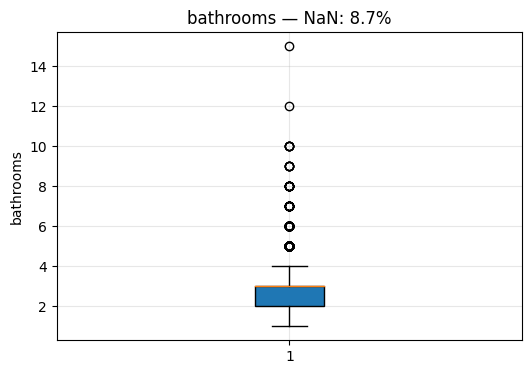

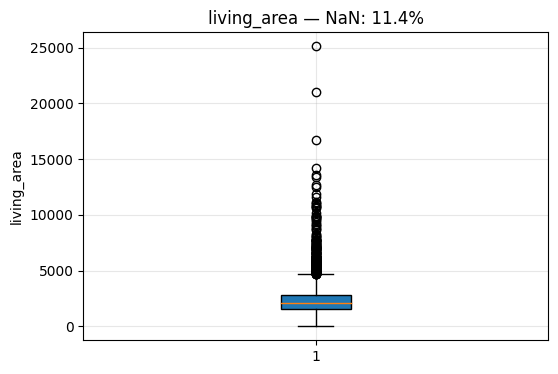

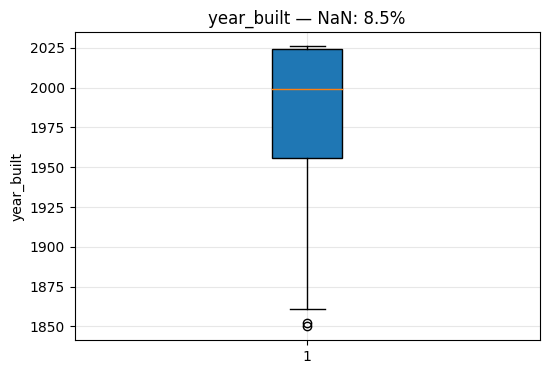

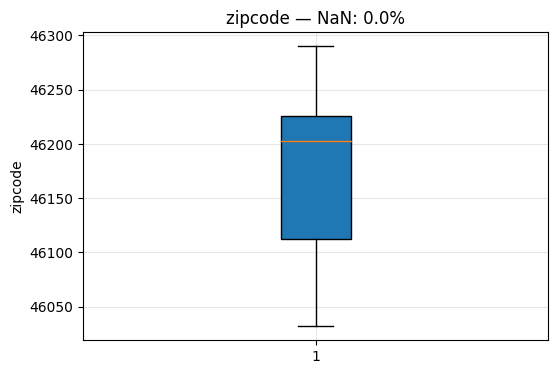

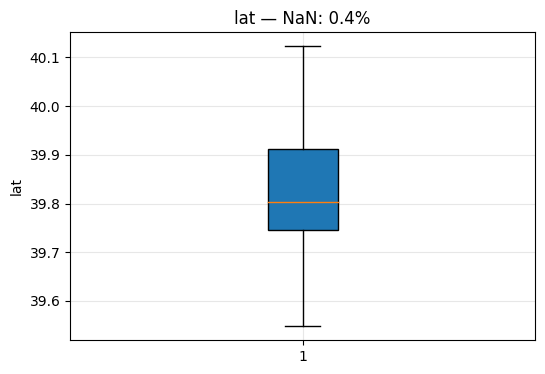

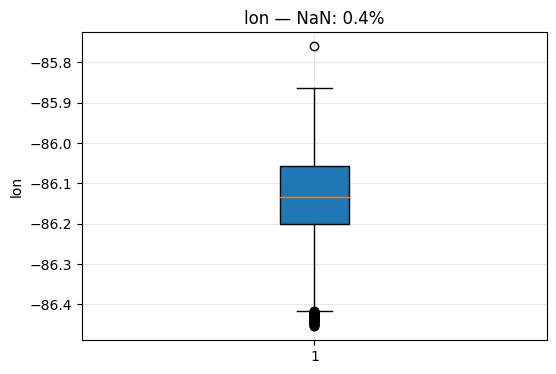

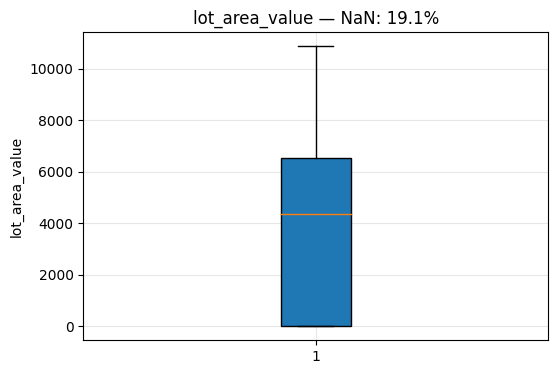

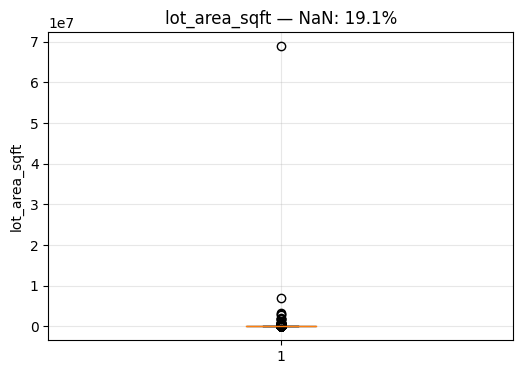

In [25]:

# Sélectionne les colonnes numériques uniquement
numeric_cols = df_unique.select_dtypes(include=["number"]).columns

# Boucle sur chaque colonne numérique
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    data = df_unique[col].dropna()  # on ignore les NaN dans le tracé
    pct_nan = df_unique[col].isna().mean() * 100  # pourcentage de NaN
    
    # Création du boxplot
    plt.boxplot(data, vert=True, patch_artist=True)
    
    # Titre avec le pourcentage de NaN
    plt.title(f"{col} — NaN: {pct_nan:.1f}%")
    plt.ylabel(col)
    plt.grid(alpha=0.3)
    plt.show()


In [29]:
nb_lignes_nan = df_unique.isna().any(axis=1).sum()
print(f"Nombre de lignes contenant au moins un NaN : {nb_lignes_nan}")


Nombre de lignes contenant au moins un NaN : 2043


In [31]:
df_unique.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zpid            6482 non-null   int64  
 1   address         6482 non-null   object 
 2   sale_price      6407 non-null   float64
 3   bedrooms        5920 non-null   float64
 4   bathrooms       5915 non-null   float64
 5   living_area     5746 non-null   float64
 6   year_built      5931 non-null   float64
 7   zipcode         6480 non-null   float64
 8   lat             6453 non-null   float64
 9   lon             6453 non-null   float64
 10  lot_area_value  5244 non-null   float64
 11  lot_area_unit   5244 non-null   object 
 12  lot_area_sqft   5244 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 658.5+ KB


In [49]:
df_unique_clean = df_unique.drop(['address', 'lot_area_value', 'lot_area_unit'], axis=1)


In [51]:
df_unique_clean.isna().sum()

zpid                0
sale_price         75
bedrooms          562
bathrooms         567
living_area       736
year_built        551
zipcode             2
lat                29
lon                29
lot_area_sqft    1238
dtype: int64

In [53]:
nb_lignes_nan = df_unique_clean.isna().any(axis=1).sum()
print(f"Nombre de lignes contenant au moins un NaN : {nb_lignes_nan}")

Nombre de lignes contenant au moins un NaN : 2043


In [55]:
df_cut = df_unique_clean.drop(['lot_area_sqft'], axis=1)

In [57]:
df_cut.isna().sum()

zpid             0
sale_price      75
bedrooms       562
bathrooms      567
living_area    736
year_built     551
zipcode          2
lat             29
lon             29
dtype: int64

In [59]:
nb_lignes_nan = df_cut.isna().any(axis=1).sum()
print(f"Nombre de lignes contenant au moins un NaN : {nb_lignes_nan}")

Nombre de lignes contenant au moins un NaN : 829


In [61]:
df_cut_no_nan = df_cut.dropna().reset_index(drop=True)

print(f"Lignes avant suppression : {len(df_cut)}")
print(f"Lignes après suppression : {len(df_cut_no_nan)}")
print(f"Lignes supprimées : {len(df_cut) - len(df_cut_no_nan)}")


Lignes avant suppression : 6482
Lignes après suppression : 5653
Lignes supprimées : 829


In [63]:
df_cut_no_nan.isna().sum()

zpid           0
sale_price     0
bedrooms       0
bathrooms      0
living_area    0
year_built     0
zipcode        0
lat            0
lon            0
dtype: int64

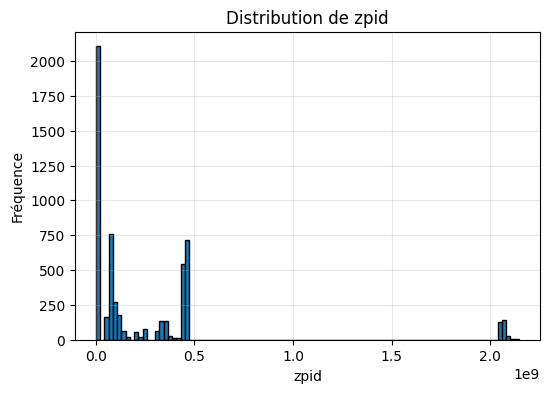

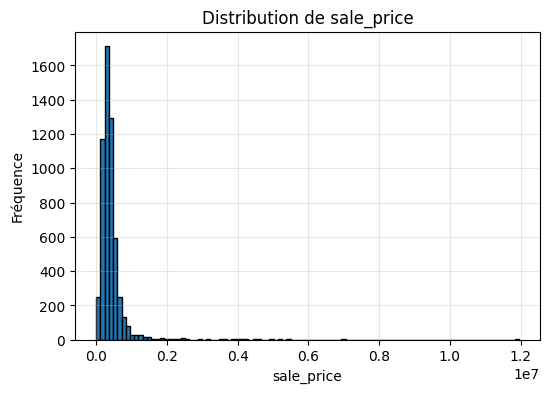

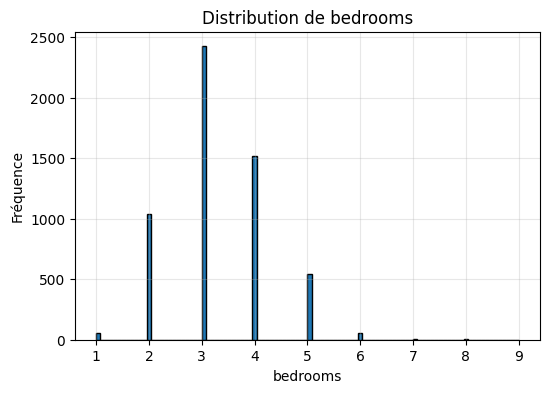

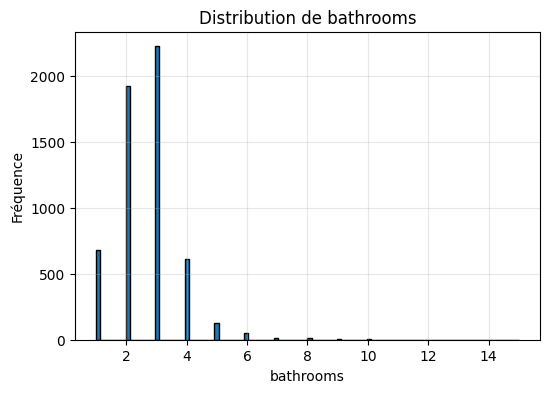

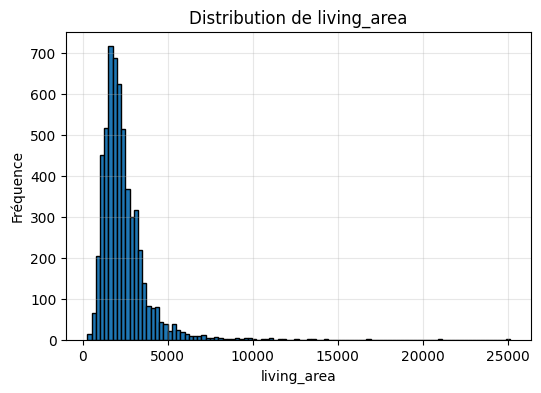

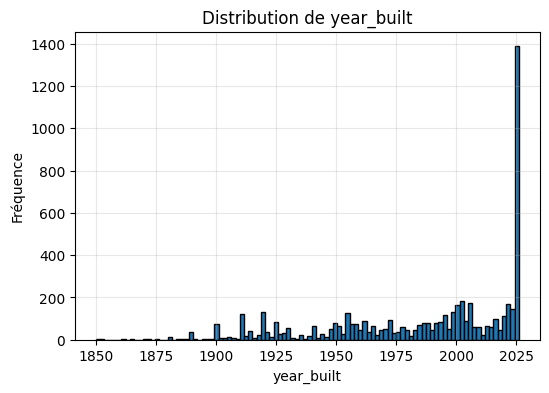

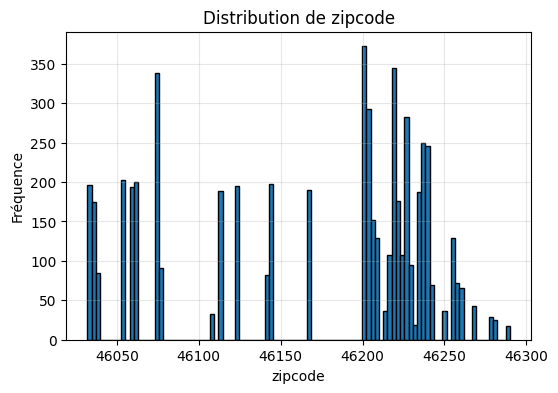

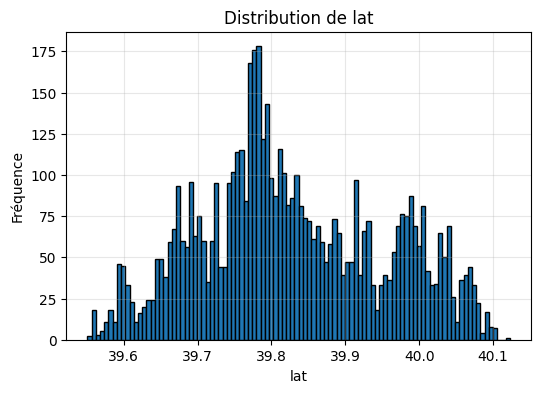

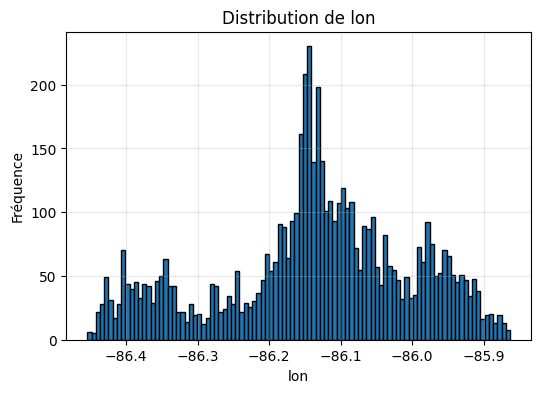

In [65]:

# Sélectionne les colonnes numériques uniquement
numeric_cols = df_cut_no_nan.select_dtypes(include=["number"]).columns

# Affiche un histogramme par colonne
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df_cut_no_nan[col].dropna(), bins=100, edgecolor='black')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(alpha=0.3)
    plt.show()

In [67]:
df_cut_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653 entries, 0 to 5652
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zpid         5653 non-null   int64  
 1   sale_price   5653 non-null   float64
 2   bedrooms     5653 non-null   float64
 3   bathrooms    5653 non-null   float64
 4   living_area  5653 non-null   float64
 5   year_built   5653 non-null   float64
 6   zipcode      5653 non-null   float64
 7   lat          5653 non-null   float64
 8   lon          5653 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 397.6 KB


In [69]:
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    return mask.sum(), lower, upper

for col in ['living_area', 'sale_price']:
    n_outliers, low, high = count_outliers_iqr(df_cut_no_nan, col)
    print(f"{col} → {n_outliers} outliers (bornes [{low:.0f}, {high:.0f}])")


living_area → 238 outliers (bornes [-320, 4736])
sale_price → 322 outliers (bornes [-78985, 768975])


In [71]:
# Fonction pour calculer les bornes IQR
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Calcul des bornes pour chaque variable
low_liv, high_liv = iqr_bounds(df_cut_no_nan['living_area'])
low_price, high_price = iqr_bounds(df_cut_no_nan['sale_price'])

# Création des masques d’outliers
mask_liv = (df_cut_no_nan['living_area'] < low_liv) | (df_cut_no_nan['living_area'] > high_liv)
mask_price = (df_cut_no_nan['sale_price'] < low_price) | (df_cut_no_nan['sale_price'] > high_price)

# Combinaison : lignes contenant un outlier dans au moins une des deux colonnes
mask_any = mask_liv | mask_price

# Comptage
n_outlier_rows = mask_any.sum()

print(f"Nombre de lignes contenant au moins un outlier (living_area ou sale_price) : {n_outlier_rows}")


Nombre de lignes contenant au moins un outlier (living_area ou sale_price) : 393


In [73]:
# on choisit de conserver les outliers et on cree un csv a partir de df_cut_no_nan

df_cut_no_nan.to_csv("df_cut_no_nan.csv", index=False)
